In [1]:
import openpnm as op
import numpy as np
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()

Nx, Ny, Nz = 10, 10, 10
Lc = 1e-4
pn = op.network.Cubic([Nx, Ny, Nz], spacing=Lc)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x298b0a570>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                   1000 / 1000
  3  throat.conns                                                  2700 / 2700
  4  pore.coordination_number                                      1000 / 1000
  5  pore.max_size                                                 1000 / 1000
  6  throat.spacing                                                2700 / 2700
  7  pore.seed                                                     1000 / 1000
  8  pore.diameter                                                 1000 / 1000
  9  throat.max_size                                               2700 / 2700
 10  t

In [2]:
hg = op.phase.Mercury(network=pn)
hg.add_model(propname='throat.entry_pressure',
             model=op.models.physics.capillary_pressure.washburn)
hg.regenerate_models()
print(hg)


══════════════════════════════════════════════════════════════════════════════
phase_01 : <openpnm.phase.Mercury at 0x104e1be90>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.temperature                                              1000 / 1000
  3  pore.pressure                                                 1000 / 1000
  4  throat.contact_angle                                          2700 / 2700
  5  pore.thermal_conductivity                                     1000 / 1000
  6  pore.surface_tension                                          1000 / 1000
  7  pore.viscosity                                                1000 / 1000
  8  pore.density                                                  1000 / 1000
  9  pore.molar_density                                            1000 / 1000
 

In [3]:
mip = op.algorithms.Drainage(network=pn, phase=hg)
mip.set_inlet_BC(pores=pn.pores(['left', 'right']))
mip.run(pressures=np.logspace(4, 6))

Performing drainage simulation:   0%|          | 0/50 [00:00<?, ?it/s]

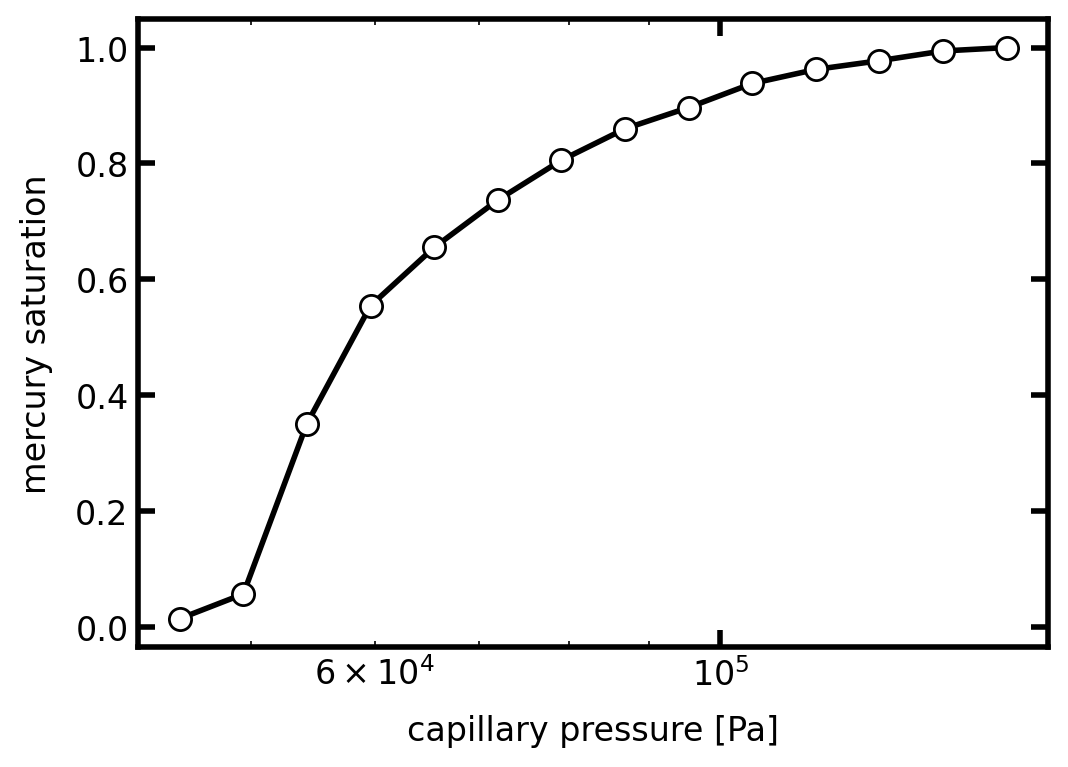

In [4]:
data = mip.pc_curve()
fig, ax = plt.subplots(figsize=(5.5, 4))
ax.semilogx(data.pc, data.snwp, 'k-o')
ax.set_xlabel('capillary pressure [Pa]')
ax.set_ylabel('mercury saturation');

In [5]:
# Generate phase and physics
water = op.phase.Water(network=pn)
water.add_model(propname='throat.hydraulic_conductance',
                model=op.models.physics.hydraulic_conductance.generic_hydraulic)

# Create algorithm, set boundary conditions and run simulation
sf = op.algorithms.StokesFlow(network=pn, phase=water)
Pin, Pout = (200_000, 101_325)
sf.set_value_BC(pores=pn.pores('left'), values=Pin)
sf.set_value_BC(pores=pn.pores('right'), values=Pout)
sf.run()

In [6]:
Q = sf.rate(pores=pn.pores('left'))
A = Ny*Nz*Lc**2
L = Nx*Lc
mu = water['pore.viscosity'].mean()
K = Q*mu*L/(A*(Pin-Pout))
print(K)

[7.2488841e-13]


## Generating Networks and Quick Visualizations

[Full Tutorial](https://openpnm.org/examples/tutorials/02_network_generation_and_visualization.html)



In [7]:
import openpnm as op
import numpy as np
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()

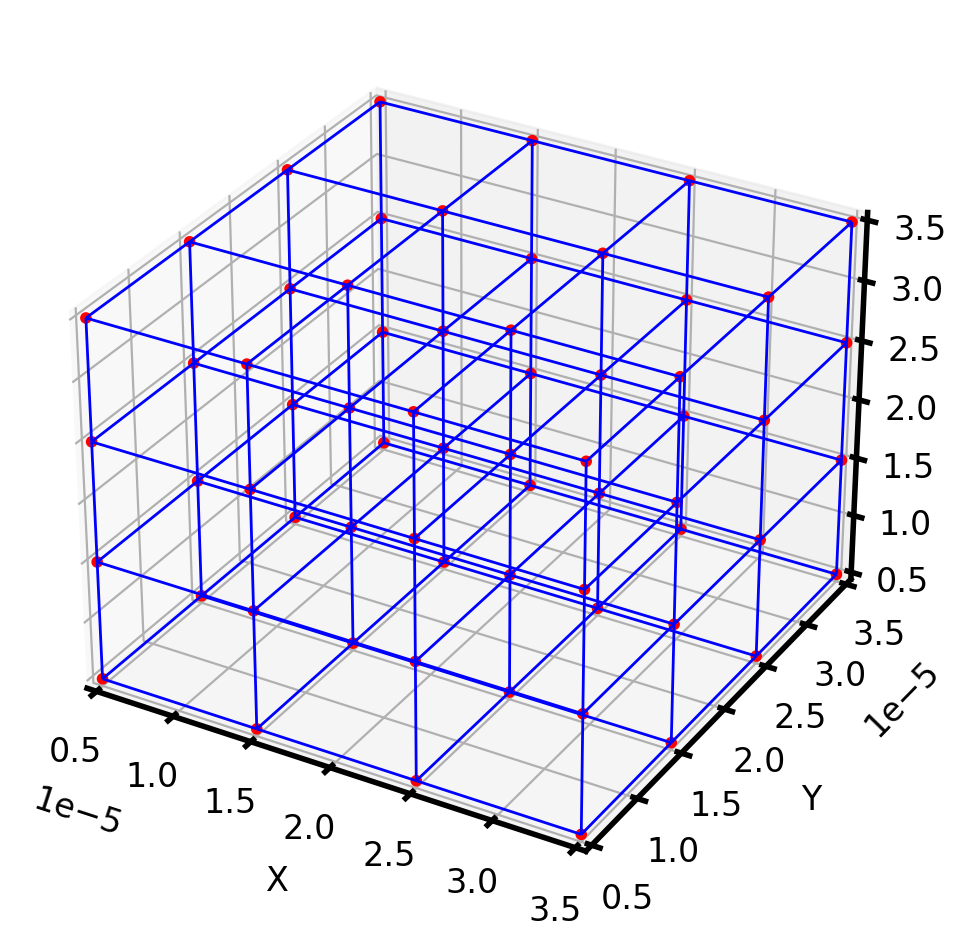

In [8]:
pn = op.network.Cubic(shape=[4, 4, 4], spacing=1e-5)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

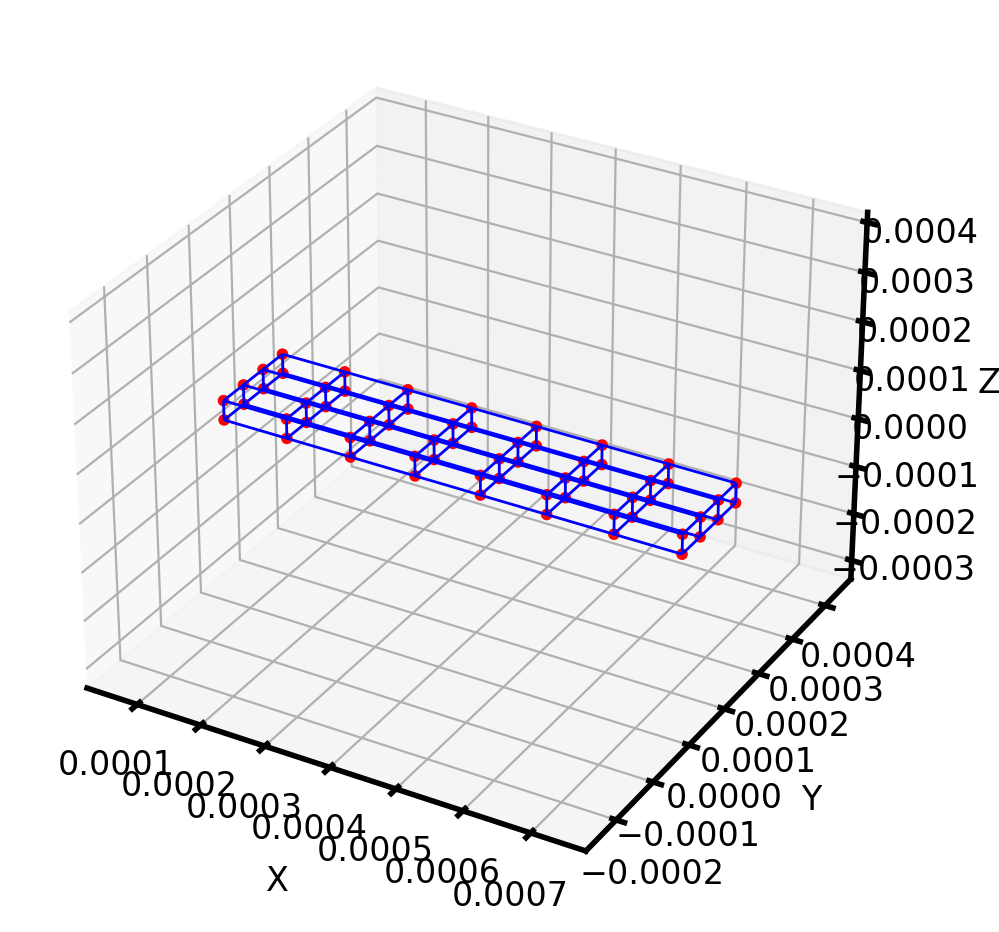

In [9]:
pn = op.network.Cubic(shape=[8, 4, 2], spacing=[10e-5, 5e-5, 4e-5])
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

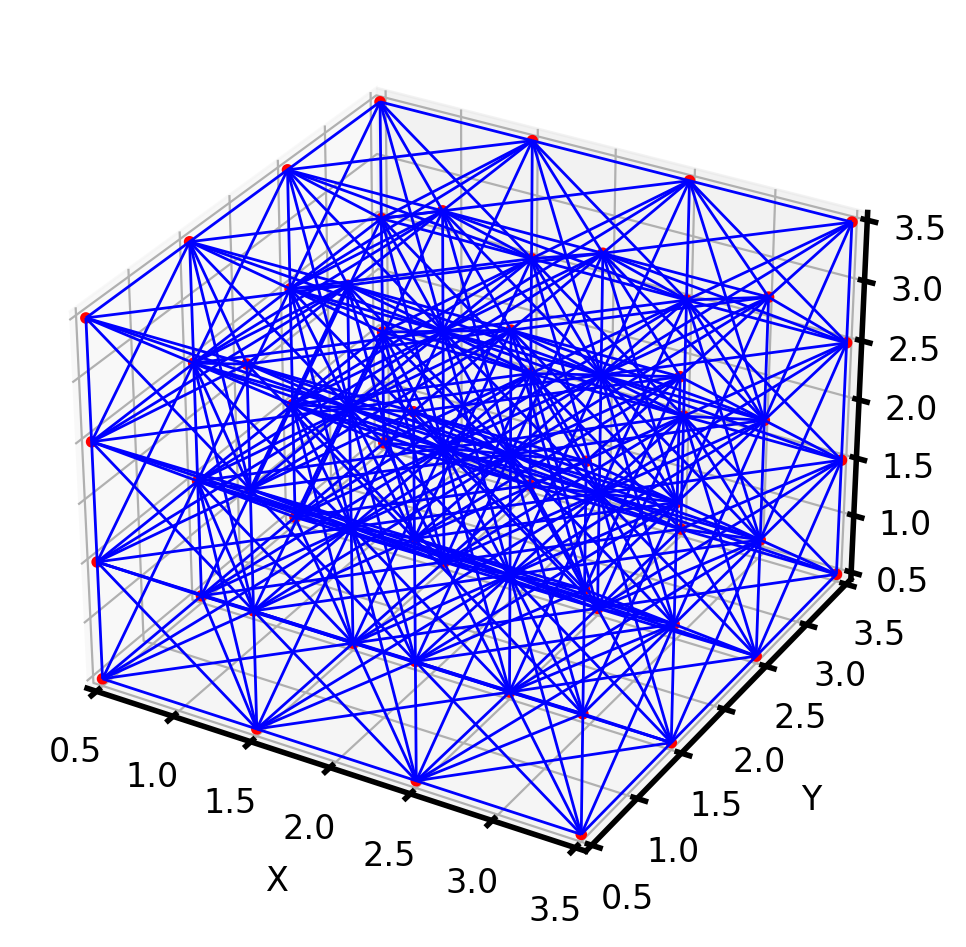

In [10]:
pn = op.network.Cubic(shape=[4, 4, 4], connectivity=26)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

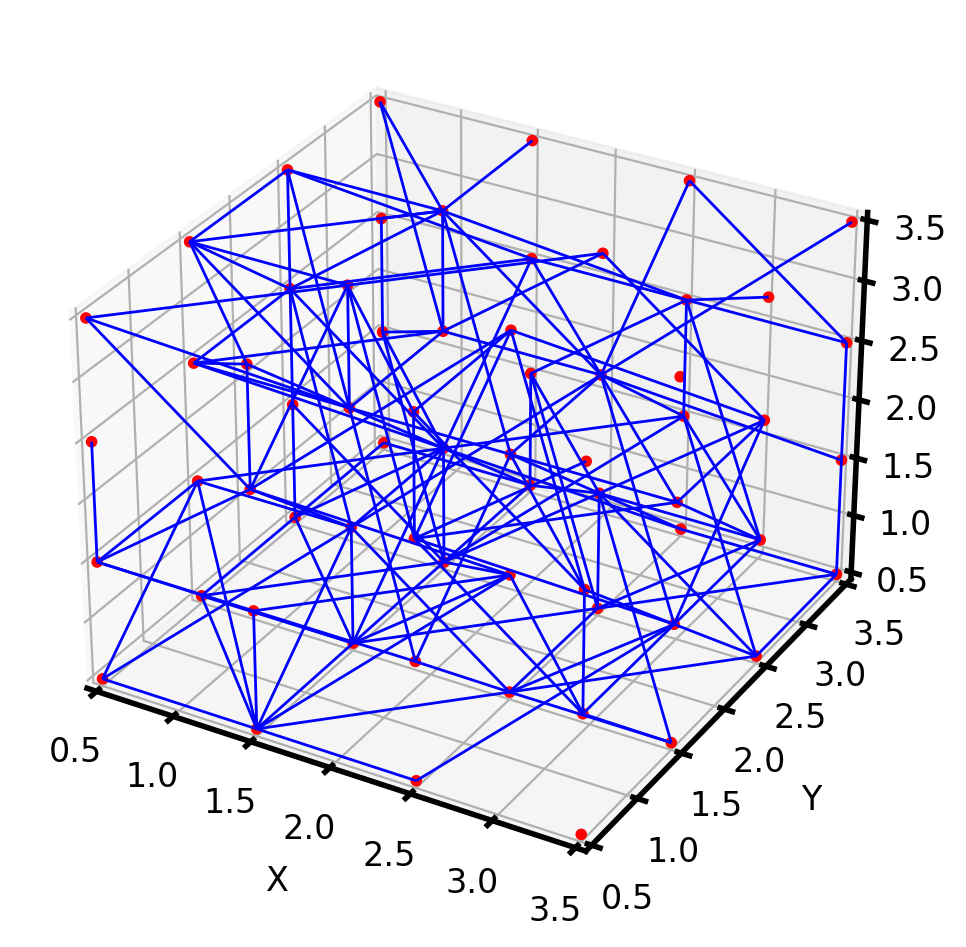

In [11]:
pn = op.network.Cubic(shape=[4, 4, 4], connectivity=26)
np.random.seed(0)
drop = np.random.randint(0, pn.Nt, 500)
op.topotools.trim(network=pn, throats=drop)
ax = op.visualization.plot_coordinates(pn)
ax = op.visualization.plot_connections(pn, ax=ax)

In [12]:
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x2a50904d0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       64 / 64
  3  throat.conns                                                    161 / 161
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                              16
  3  pore.xmax                                                              16
  4  pore.ymin                                                              16
  5  p

## Storage of Network Data and Topology

[Full Tutorial](https://openpnm.org/examples/tutorials/03_data_and_topology_storage.html)

# creating a phase

[Tutorial](https://openpnm.org/examples/tutorials/07_phases_and_mixtures.html)

In [1]:
import openpnm as op
import numpy as np
op.visualization.set_mpl_style()

In [2]:
pn = op.network.Demo(shape=[2, 2, 1])

In [3]:
phase1 = op.phase.Phase(network=pn)
print(phase1)


══════════════════════════════════════════════════════════════════════════════
phase_01 : <openpnm.phase.Phase at 0x103d86e70>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.temperature                                                    4 / 4
  3  pore.pressure                                                       4 / 4
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                                4
  3  throat.all                                                              4
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [4]:
phase1['pore.viscosity'] = 0.001  # Pa.s

In [5]:
phase1['pore.viscosity']

array([0.001, 0.001, 0.001, 0.001])

In [6]:
a4 = 5.8543E-11
a3 = -7.6756E-08
a2 = 3.7831E-05
a1 = -8.3156E-03
a0 = 6.8898E-01

In [7]:
print('Before:', phase1['pore.viscosity'])
f = op.models.misc.polynomial
phase1.add_model(propname='pore.viscosity', 
                 model=f,
                 a = (a0, a1, a2, a3, a4),
                 prop='pore.temperature')
print('After:', phase1['pore.viscosity'])

Before: [0.001 0.001 0.001 0.001]
After: [0.00091476 0.00091476 0.00091476 0.00091476]


In [11]:
print('Before:', phase1['pore.viscosity'])
phase1['pore.temperature'] = 300.0 + np.random.rand(pn.Np)*50
phase1.regenerate_models()
print('After:', phase1['pore.viscosity'])

Before: [0.00091476 0.00091476 0.00091476 0.00091476]
After: [0.00042564 0.00063546 0.0005639  0.00054438]


# Simulating Single Phase Transport

[Tutorial](https://openpnm.org/examples/tutorials/08_simulating_transport.html)

In [12]:
import numpy as np
import openpnm as op
op.visualization.set_mpl_style()

pn = op.network.Demo(shape=[5, 5, 1], spacing=5e-5)
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Demo at 0x17ed0e8d0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       25 / 25
  3  throat.conns                                                      40 / 40
  4  pore.coordination_number                                          25 / 25
  5  pore.max_size                                                     25 / 25
  6  throat.spacing                                                    40 / 40
  7  pore.seed                                                         25 / 25
  8  pore.diameter                                                     25 / 25
  9  throat.max_size                                                   40 / 40
 10  th

In [13]:
water = op.phase.Phase(network=pn)

In [14]:
water.add_model(propname='pore.viscosity',
                model=op.models.phase.viscosity.water_correlation)
print(water)


══════════════════════════════════════════════════════════════════════════════
phase_01 : <openpnm.phase.Phase at 0x17f35bb30>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.temperature                                                  25 / 25
  3  pore.pressure                                                     25 / 25
  4  pore.viscosity                                                    25 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                               25
  3  throat.all                                                             40
―――

In [15]:
print(water['pore.viscosity'])

[0.00089319 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319
 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319
 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319
 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319 0.00089319
 0.00089319]


### Conductance Example

In [22]:
R = pn['throat.diameter']/2
L = pn['throat.length']
mu = water['throat.viscosity']  # See ProTip below
water['throat.hydraulic_conductance'] = np.pi*R**4/(8*mu*L)
print(water['throat.hydraulic_conductance'])

[3.99458827e-14 1.74942568e-14 1.70898242e-15 1.52900992e-15
 5.98596623e-16 5.55104161e-16 2.50411671e-15 2.54471778e-15
 6.20129814e-15 6.35681402e-15 2.49763381e-14 5.61867190e-16
 1.45125423e-15 1.32389776e-15 8.78594938e-15 4.10296691e-14
 7.69865699e-15 7.98659183e-15 8.90531241e-14 4.34548114e-15
 3.53301534e-14 6.05952014e-16 1.29219380e-14 1.50939728e-15
 3.22062092e-15 3.47970866e-14 5.24289722e-16 1.48724657e-14
 2.62069509e-15 5.46789082e-16 2.56109592e-14 1.30182543e-15
 8.23326878e-15 2.68549809e-14 5.84251428e-16 2.66062871e-14
 1.31724687e-15 8.61709189e-15 9.19596116e-14 3.93535655e-15]


In [23]:
water.interpolate_data('throat.viscosity')

array([0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319])

In [24]:
water['throat.viscosity']

array([0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319,
       0.00089319, 0.00089319, 0.00089319, 0.00089319, 0.00089319])

### Creating Algorithm

In [25]:
sf = op.algorithms.StokesFlow(network=pn, phase=water)
print(sf)


══════════════════════════════════════════════════════════════════════════════
stokes_02 : <openpnm.algorithms.StokesFlow at 0x17fa84170>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                       0 / 25
  3  pore.bc.value                                                      0 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                               25
  3  throat.all                                                             40
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――

### Boundary Conditions

In [26]:
sf.set_value_BC(pores=pn.pores('left'), values=100_000)
sf.set_rate_BC(pores=pn.pores('right'), rates=1e-10)
print(sf)


══════════════════════════════════════════════════════════════════════════════
stokes_02 : <openpnm.algorithms.StokesFlow at 0x17fa84170>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                       5 / 25
  3  pore.bc.value                                                      5 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                               25
  3  throat.all                                                             40
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――

In [27]:
print(sf['pore.bc'].keys())

dict_keys(['rate', 'value'])


In [28]:
soln = sf.run()

In [29]:
print(soln)

None


In [30]:
print(sf)


══════════════════════════════════════════════════════════════════════════════
stokes_02 : <openpnm.algorithms.StokesFlow at 0x17fa84170>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.bc.rate                                                       5 / 25
  3  pore.bc.value                                                      5 / 25
  4  pore.pressure                                                     25 / 25
  5  pore.initial_guess                                                25 / 25
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.all                                                          

In [31]:
sf['pore.pressure'][pn.pores('right')]

array([129640.33988104, 141873.50369526, 143032.00309593, 142614.4009501 ,
       154205.82153132])

# Custom Example for Thermal Modelling

In [32]:
import openpnm as op
import matplotlib.pyplot as plt
import ecm
import liionpack as lp
import pybamm
import numpy as np

In [33]:
wrk = op.Workspace()
wrk.clear()

In [34]:
Nunit = 10
spacing = 0.1
pos_tabs = [-1]
neg_tabs = [0]
project, arc_edges = ecm.make_1D_net(Nunit, spacing, pos_tabs, neg_tabs)

In [35]:
print(project.network)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x17fa872f0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                       48 / 48
  3  throat.conns                                                      56 / 56
  4  throat.spm_resistor_order                                         56 / 56
  5  pore.radial_position                                              48 / 48
  6  pore.arc_index                                                    48 / 48
  7  pore.region_id                                                    48 / 48
  8  pore.cell_id                                                      48 / 48
  9  throat.arc_length                                                 56 / 56
 10  t

In [36]:
net = project.network
net

net : <openpnm.network.Cubic at 0x17fa872f0>

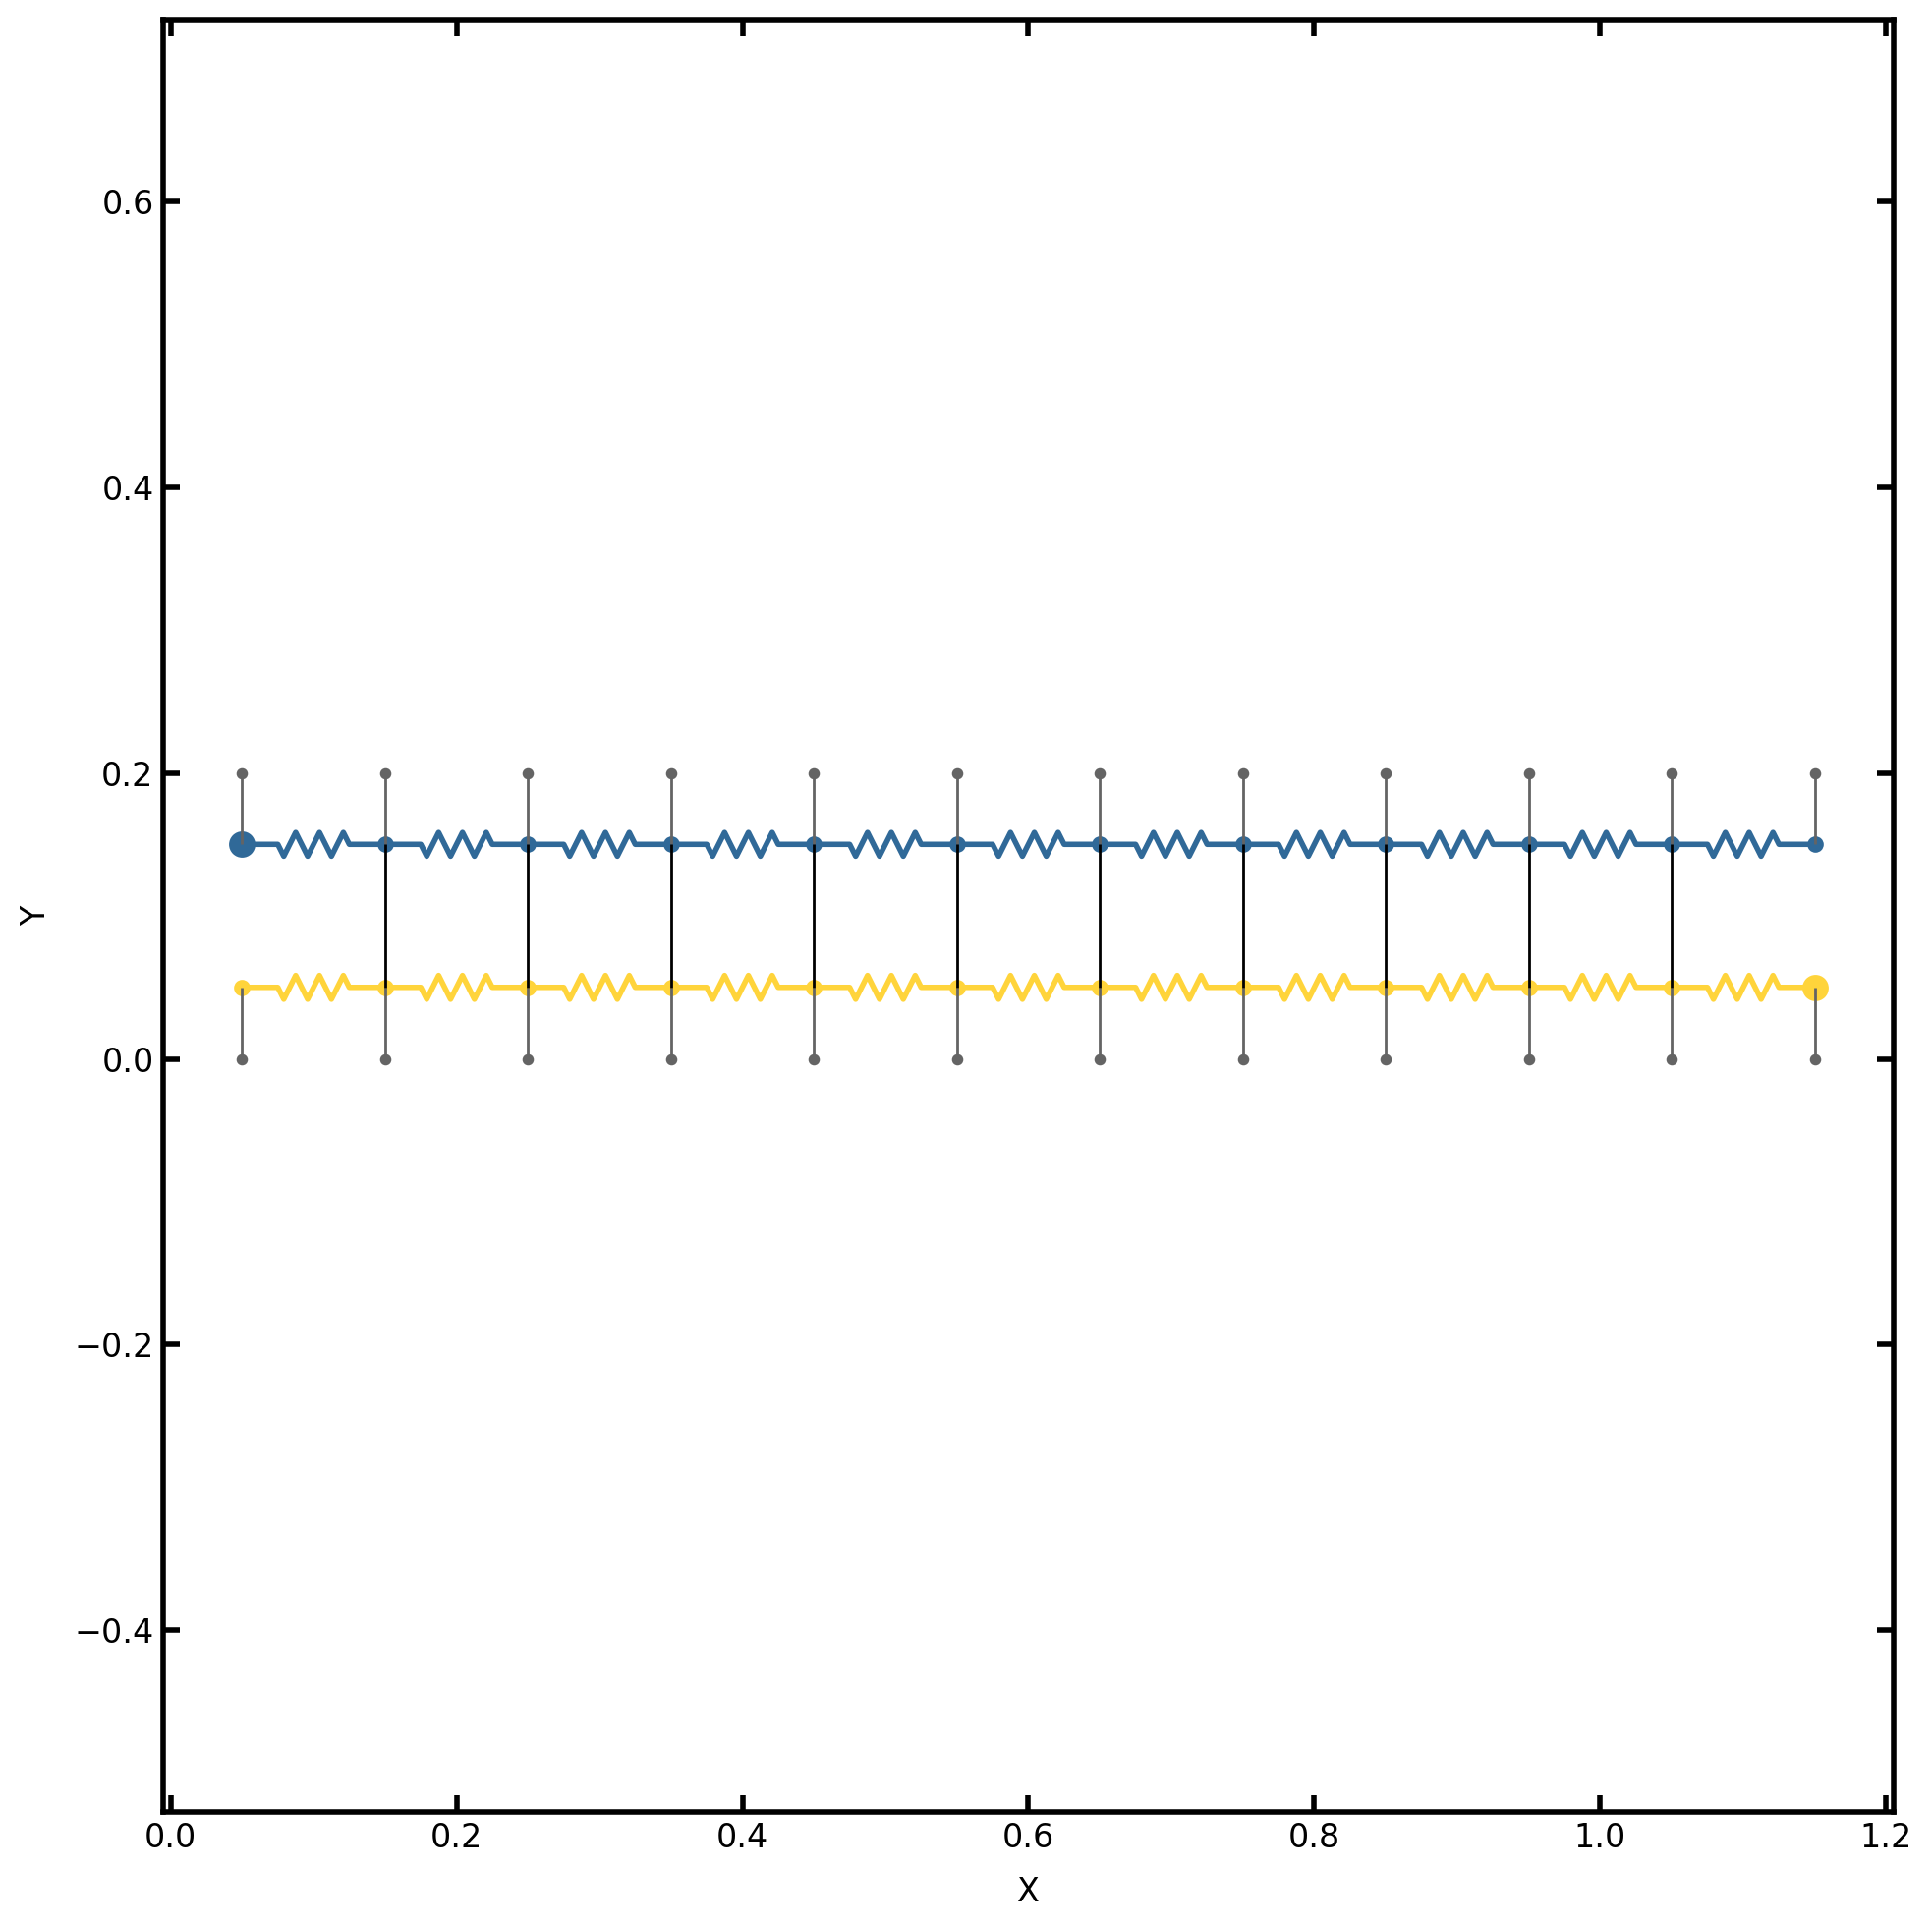

In [37]:
ecm.plot_topology(net)

In [38]:
net.labels()

['pore.all',
 'pore.free_stream',
 'pore.neg_cc',
 'pore.neg_tab',
 'pore.pos_cc',
 'pore.pos_tab',
 'pore.xmax',
 'pore.xmin',
 'pore.ymax',
 'pore.ymin',
 'throat.all',
 'throat.back_boundary',
 'throat.free_stream',
 'throat.front_boundary',
 'throat.neg_cc',
 'throat.pos_cc',
 'throat.spm_neg_inner',
 'throat.spm_resistor']

In [39]:
net.Np

48

In [40]:
np.allclose(net.num_pores('pos_cc'), net.num_pores('neg_cc'), net.num_pores('free_stream')/2, 12)

True

In [41]:
net.Nt

56

In [43]:
phase = op.phase.Phase(net)

In [56]:
# set thermal parameters
parameter_values = {
   "Total heat transfer coefficient [W.m-2.K-1]":0.1,
    "thickness [m]":0.1,
    "density [kg.m-3]":12,
    "specific heat capacity [J.kg-1.K-1]":1.08,
    "thermal conductivity [W.m-1.K-1]":12,
}

total_htc = parameter_values["Total heat transfer coefficient [W.m-2.K-1]"]

In [63]:
# setting conductances
net['throat.electrical_conductance'] = 0.0
net['throat.electrical_conductance'][net.throats('neg_cc')] = 0.1
net['throat.electrical_conductance'][net.throats('pos_cc')] = 0.2

# setting initial conditions and algs
phase['pore.temperature'] = 300
net['throat.thermal_conductance'] = 1.0 * net['throat.area'] / net['throat.length']
net['throat.thermal_conductance'][net.throats('spm_resistor')] *= 2
net['throat.thermal_conductance'][net.throats('spm_resistor', mode='not')] *= 0.5
Ts = net.throats('free_stream')
net['throat.thermal_conductance'][Ts] = total_htc * net['throat.thermal_conductance'][Ts]


In [64]:
# apply heat source
Q = 10
spm_Ts = net.throats('spm_resistor')
phase['throat.heat_source'] = 0.0
phase['throat.heat_source'][spm_Ts] = Q

# model for throats to heat the pores
phase.add_model(
    propname='pore.heat_source',
    model=op.models.misc.from_neighbor_throats,
    prop='throat.heat_source',
    mode='max',
)

In [105]:
# run a simulation with time step

alg = op.algorithms.TransientFourierConduction(network=net, phase=phase)
outlet = net['pore.free_stream']
bulk_pores = net.pores('free_stream', mode='not')
# alg.set_value_BC(values=312,pores=inlet)
alg.set_value_BC(values=298, pores=outlet)
alg.set_source(bulk_pores, 'pore.source')

alg.run(x0=phase['pore.temperature'],tspan=[0,1])

In [106]:
phase['pore.temperature'] = alg['pore.temperature']

In [107]:
phase['pore.temperature'].shape

(48,)

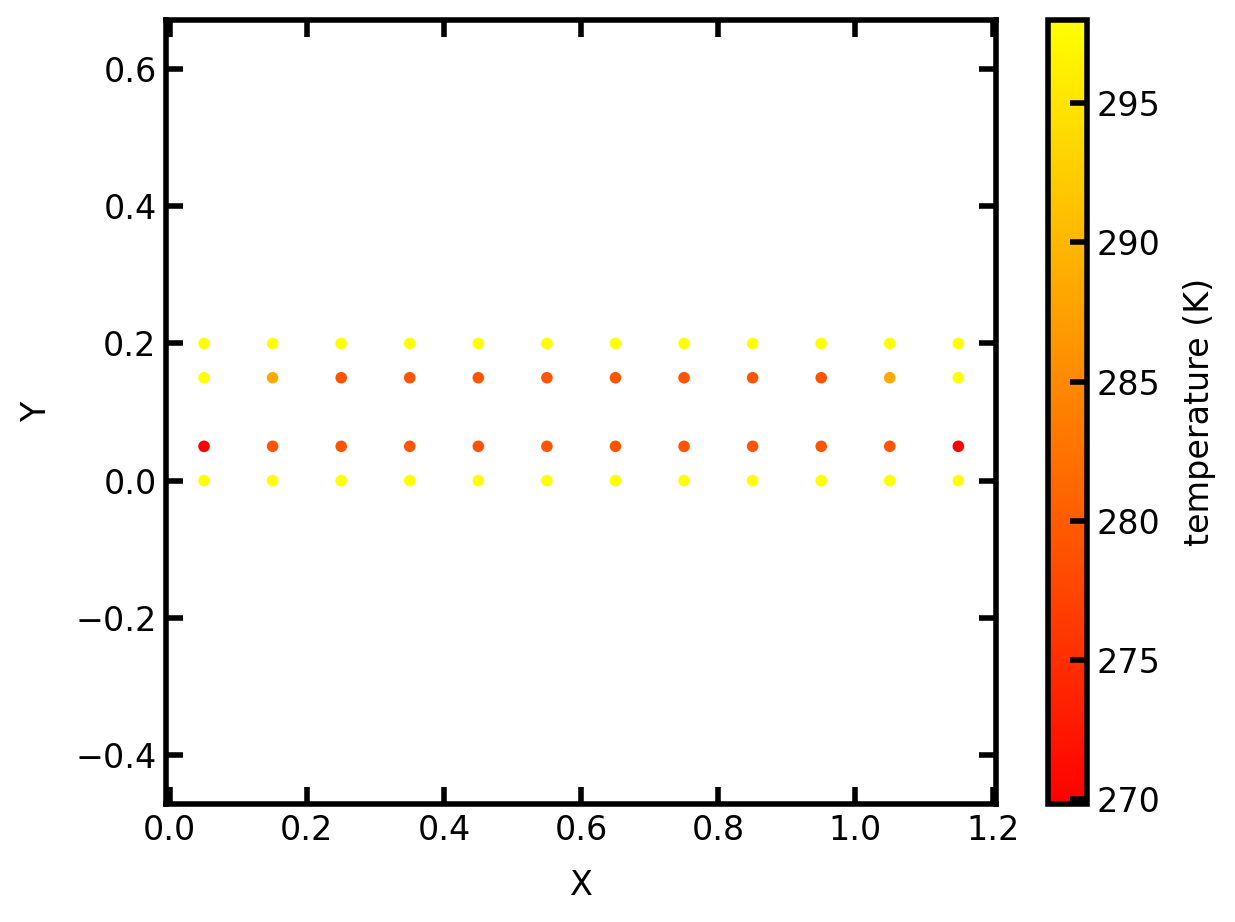

In [108]:
# ax2 = op.visualization.plot_connections(net)
import matplotlib as mpl
fig, ax = plt.subplots()
viridis = mpl.colormaps['autumn'].resampled(4)
cmap = mpl.cm.autumn
norm = mpl.colors.Normalize(vmin=phase['pore.temperature'].min(), vmax=phase['pore.temperature'].max())
op.visualization.plot_coordinates(net, ax=ax, color_by=phase['pore.temperature'],cmap=viridis)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            ax=ax, orientation='vertical', label='temperature (K)')

In [74]:
phase['pore.temperature']

array([250.        , 312.        , 250.        , 312.        ,
       250.        , 312.        , 250.        , 312.        ,
       250.        , 312.        , 250.        , 312.        ,
       250.        , 312.        , 250.        , 312.        ,
       250.        , 312.        , 250.        , 312.        ,
       250.        , 312.        , 250.        , 312.        ,
       297.56147123, 297.56147123, 297.56147123, 297.56147123,
       297.56147123, 297.56147123, 297.56147123, 297.56147123,
       297.56147123, 297.56147123, 297.56147123, 297.56147123,
       300.58524691, 300.58524691, 300.58524691, 300.58524691,
       300.58524691, 300.58524691, 300.58524691, 300.58524691,
       300.58524691, 300.58524691, 300.58524691, 300.58524691])